### Lokta Volterra Model

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}t} = \alpha\Psi_1 - \beta\Psi_1\Psi_2$


$\frac{\mathrm{d}\Psi_2}{\mathrm{d}t} = \delta\Psi_1\Psi_2 - \gamma\Psi_2$

$\alpha = 0.4, \beta = 0.4, \delta = 0.09, \gamma = 2$

$\Psi_1(0) = 100, \Psi_2(0) = 8, t \in [0, 8]$

In [1]:
from typing import List, Callable, Tuple
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode
from core.loss_function import trial_grad

In [2]:
PSI_0 = np.array([100, 8])
ABDG = np.array([0.4, 0.4, 0.09, 2])


def derivative(t, psi) -> np.ndarray:
    """The Lorenz derivatives.

    Args:
        t: input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at t.
    """
    a, b, d, g = ABDG
    psi_1_dot = a * psi[0] - b * psi[0] * psi[1]
    psi_2_dot = d * psi[0] * psi[1] - g * psi[1]
    return np.array([psi_1_dot, psi_2_dot])


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 304.8495623893757


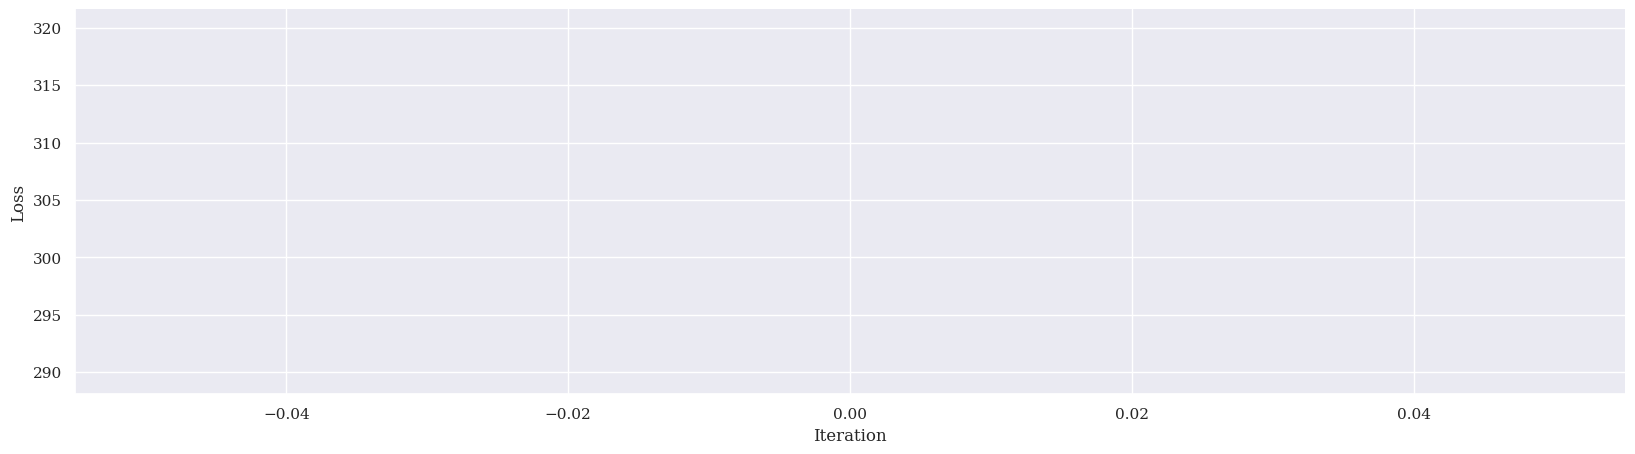

In [54]:
def train():
    t = np.arange(0, 5, 0.1)
    hidden_sizes = np.array([10])
    activation_fns = [tanh] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights_1 = init_weights(1, hidden_sizes, 1)
    nn_weights_2 = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights_1, nn_weights_2],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=1,
        step_size=0.001,
        threshold=0.001,
    )

    return [nn_weights_1, nn_weights_2], activation_fns


weights_list, activation_fns = train()

Iteration:  0
 303.5010660607863
Iteration:  1
 303.3662850213272
Iteration:  2
 303.2315168266739
Iteration:  3
 303.0967617047333
Iteration:  4
 302.9620198810014
Iteration:  5
 302.8272915780952
Iteration:  6
 302.69257701530097
Iteration:  7
 302.55787640814174
Iteration:  8
 302.4231899679678
Iteration:  9
 302.2885179015722
Iteration:  10
 302.153860410834
Iteration:  11
 302.0192176923922
Iteration:  12
 301.88458993735026
Iteration:  13
 301.74997733101384
Iteration:  14
 301.61538005266215
Iteration:  15
 301.4807982753535
Iteration:  16
 301.3462321657645
Iteration:  17
 301.21168188406375
Iteration:  18
 301.0771475838187
Iteration:  19
 300.94262941193404
Iteration:  20
 300.80812750862185
Iteration:  21
 300.6736420074012
Iteration:  22
 300.5391730351255
Iteration:  23
 300.40472071203567
Iteration:  24
 300.270285151838
Iteration:  25
 300.1358664618036
Iteration:  26
 300.0014647428873
Iteration:  27
 299.86708008986585
Iteration:  28
 299.7327125914897
Iteration:  29
 

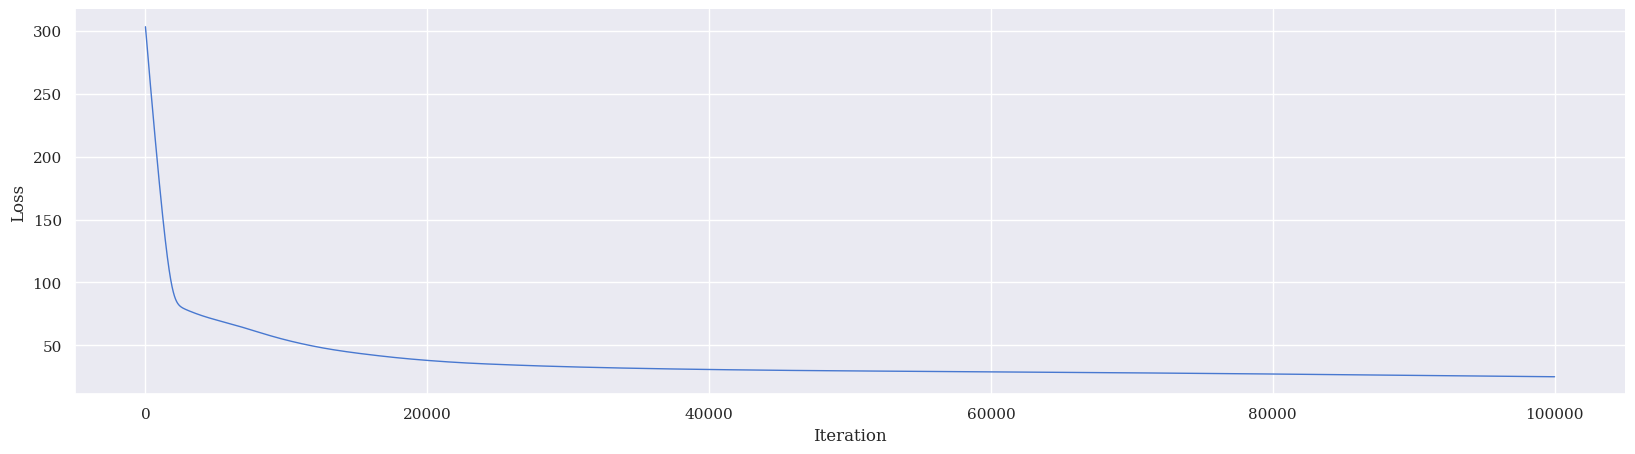

In [55]:
def continue_train(weights_list, activation_fns):
    t = np.arange(0, 5, 0.1)
    adam(
        t,
        weights_list,
        activation_fns,
        trial_solution,
        derivative,
        num_iters=100000,
        step_size=0.0001,
        threshold=0.001,
    )

    return weights_list, activation_fns


weights_list, activation_fns = continue_train(weights_list, activation_fns)

### Evaluating Results

In [45]:
from scipy.integrate import odeint

t = np.arange(0, 6, 0.01)
sol = np.array(odeint(derivative, PSI_0, t, tfirst=True))
sol = sol.T

In [46]:
t = np.arange(0, 6, 0.01)
res = trial_solution(t, weights_list, activation_fns)

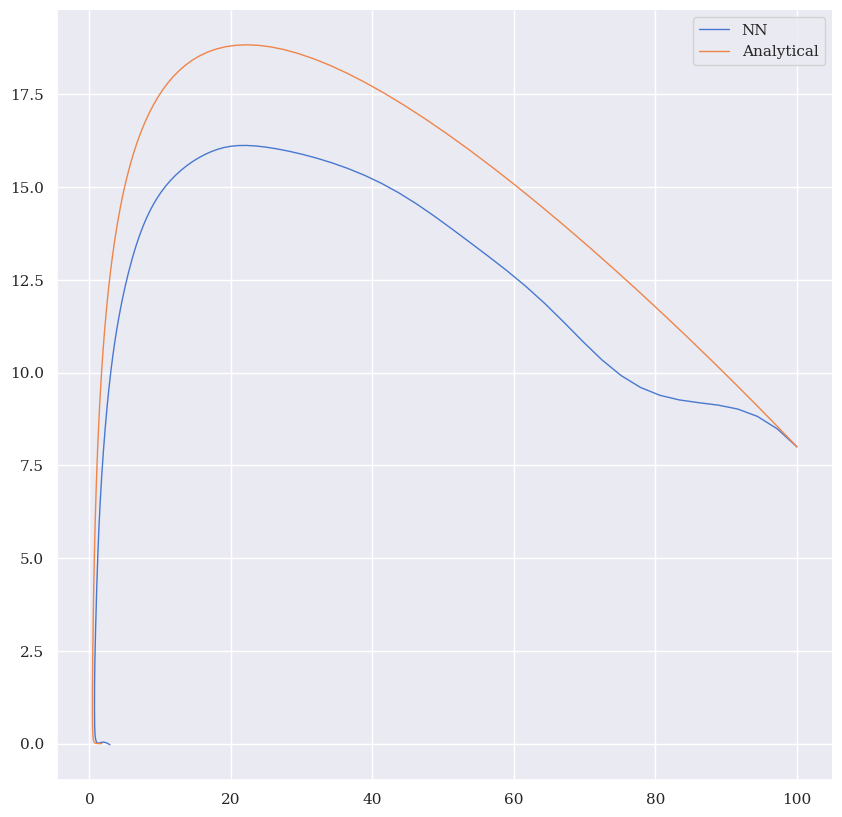

In [48]:
plot_system_ode(res, sol)

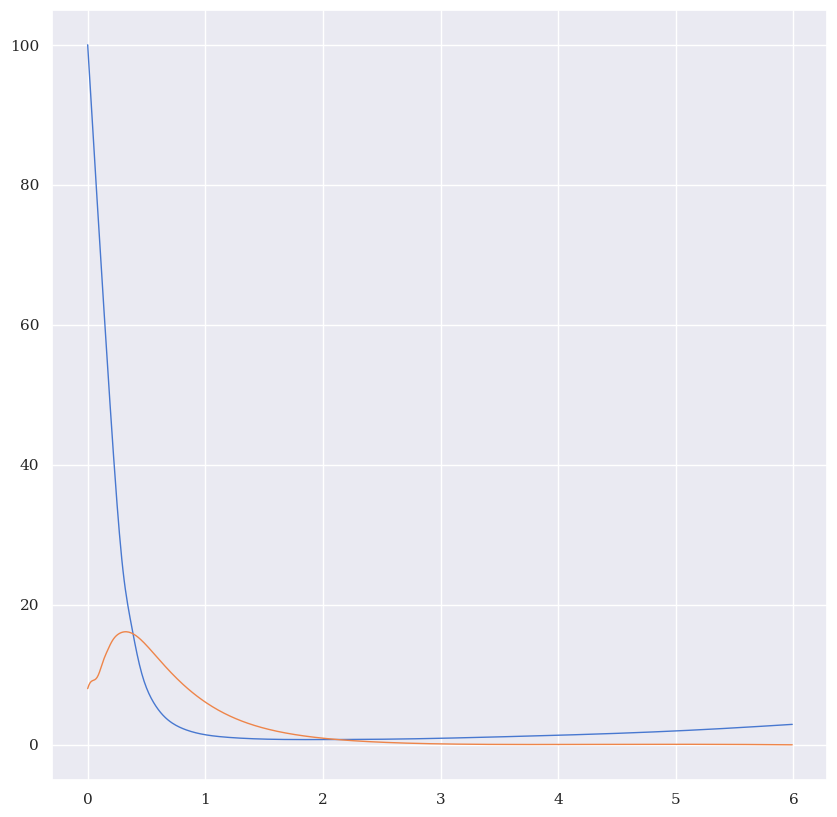

In [49]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(t, res[0], lw=1)
ax.plot(t, res[1], lw=1)

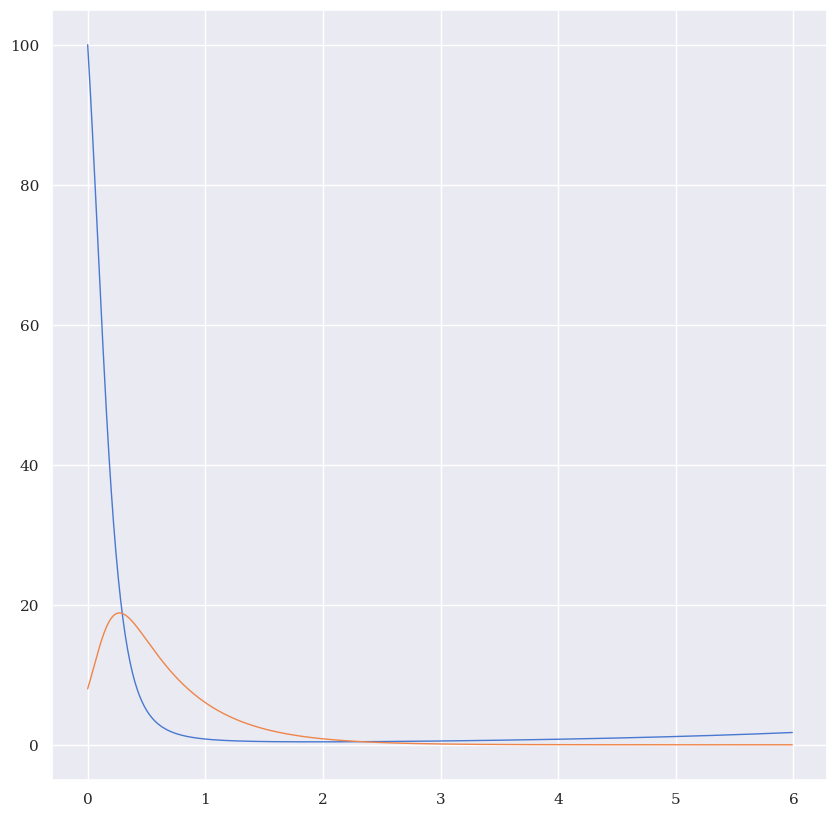

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(t, sol[0], lw=1)
ax.plot(t, sol[1], lw=1)